In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
636,6.39,43.0,1
690,7.01,26.0,0
564,7.17,34.0,1
901,7.10,50.0,1
783,6.23,24.0,1


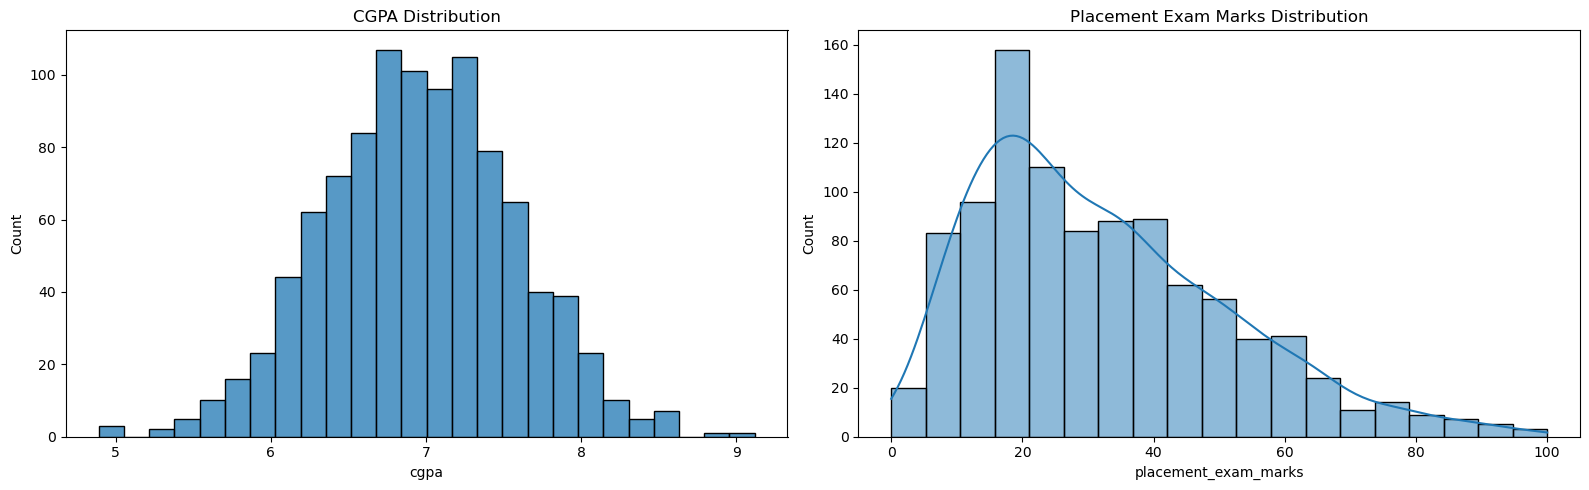

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))

sns.histplot(df['cgpa'], kde=False, ax=axes[0])
axes[0].set_title("CGPA Distribution")

sns.histplot(df['placement_exam_marks'], kde=True, ax=axes[1])
axes[1].set_title("Placement Exam Marks Distribution")

plt.tight_layout()
plt.show()


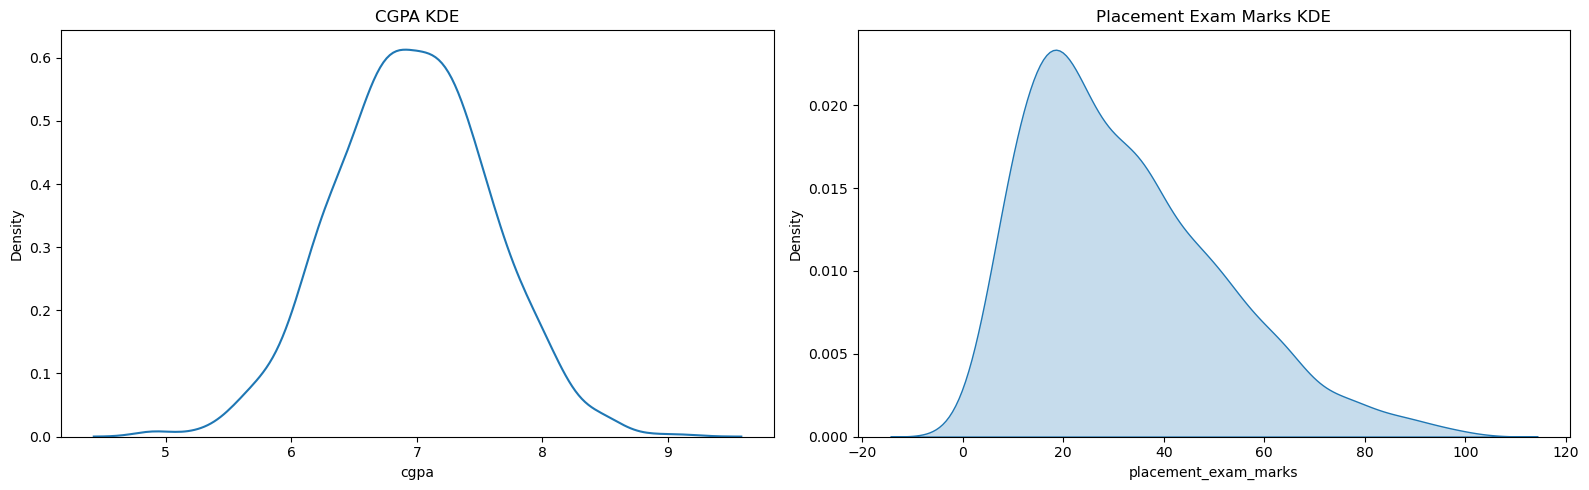

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))

sns.kdeplot(df['cgpa'], fill=False, ax=axes[0])
axes[0].set_title("CGPA KDE")

sns.kdeplot(df['placement_exam_marks'], fill=True, ax=axes[1])
axes[1].set_title("Placement Exam Marks KDE")

plt.tight_layout()
plt.show()


In [18]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [19]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

<h3> placement marks column is not normal distribution so that we can not apply Z-score on them </h3>

In [20]:

print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())


Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [21]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [28]:
# Finding the outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


<h1> Trimming </h1>

In [31]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [32]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [33]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [35]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [36]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


<h2> Capping </h2>

In [37]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

<h3> syntax of np.where </h3 >

<b>  --> np.where (condition , true part , false part ) </b>

In [39]:
df['cgpa']=np.where(df['cgpa']>upper_limit , upper_limit ,
        np.where( df['cgpa']<lower_limit , lower_limit , df['cgpa']))

In [40]:
df.shape

(1000, 4)

In [41]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64